# A-finding-the-best-markets-to-advertise-in

We're working for an an e-learning company that offers courses on programming.

Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

## Understanding the Data

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). [freeCodeCamp](freecodecamp.org) is a free e-learning platform that offers courses on web development. 

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
surveys = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

surveys.columns

/home/aguirredaniel/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

In [2]:
surveys.shape

(18175, 136)

In [3]:
surveys.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Checking for Sample Representativity

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

- Are people interested in only one subject or they can be interested in more than one subject?
- If most people are interested in more than one subject, is this sample still representative?
- The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?

In [4]:
# import matplotlib.pyplot as plt
# %matplotlib inline
jobs = surveys['JobRoleInterest'].value_counts(normalize=True) * 100
jobs

Full-Stack Web Developer                                                                                                                            11.770595
  Front-End Web Developer                                                                                                                            6.435927
  Data Scientist                                                                                                                                     2.173913
Back-End Web Developer                                                                                                                               2.030892
  Mobile Developer                                                                                                                                   1.673341
                                                                                                                                                      ...    
  Front-End Web Developer, Full-Stack Web Developer,

In [5]:
multiple_jobs = jobs[jobs.index.str.contains(',', na=False)]
multiple_jobs.sum()

68.34954233409611

- We can see 68% of people are interested in more the one topic

In [6]:
web_or_mobile = jobs[jobs.index.str.contains('web|mobile', case=False)].sum()
others = 100 - web_or_mobile
web_or_mobile, others

(86.3129290617849, 13.6870709382151)

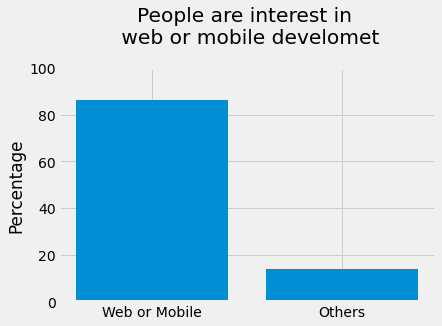

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

columns = ['Web or Mobile', 'Others']
plt.bar(columns, [web_or_mobile, others])
plt.ylim((0,100))
plt.ylabel('Percentage')
plt.title('People are interest in \n web or mobile develomet', y = 1.08)
plt.show()

We can see 86% of people are interested in web or mobile develiment.

## New Coders - Locations and Densities

For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. 

To make sure you're working with a representative sample, drop all the rows where participants didn't answer what role they are interested in

In [8]:
surveys.dropna(subset=['JobRoleInterest'], inplace=True)

In [9]:
surveys['CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Nicaragua                      1
Rwanda                         1
Turkmenistan                   1
Cameroon                       1
Bolivia                        1
Name: CountryLive, Length: 137, dtype: int64

In [10]:
surveys['CountryLive'].value_counts(normalize=True) * 100

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
                              ...    
Nicaragua                    0.014624
Rwanda                       0.014624
Turkmenistan                 0.014624
Cameroon                     0.014624
Bolivia                      0.014624
Name: CountryLive, Length: 137, dtype: float64

The majority (46%) of our potential clients are located in the United States of America.

## Spending Money for Learning

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

We'll create a new column that describes the amount of money a student has spent per month. 

*Note: Some students answered that they had been learning to code for 0 months.*

In [11]:
surveys['MonthsProgramming'] = surveys['MonthsProgramming'].apply(lambda m: m or 1)
surveys['Spent_Month'] = surveys['MoneyForLearning'] / surveys['MonthsProgramming']

surveys[['Spent_Month', 'MoneyForLearning', 'MonthsProgramming']]

,Spent_Month,MoneyForLearning,MonthsProgramming
1,13.333333,80.0,6.0
2,200.000000,1000.0,5.0
3,0.000000,0.0,5.0
4,0.000000,0.0,24.0
6,0.000000,0.0,12.0
...,...,...,...
18161,0.000000,0.0,6.0
18162,0.000000,0.0,84.0
18163,NaN,0.0,NaN
18171,10000.000000,10000.0,1.0


We'll keep only the rows that don't have a null value for the new column and also any rows that have null values in the `CountryLive` column.


In [12]:
surveys.dropna(subset=['Spent_Month', 'CountryLive'], inplace=True)

We'll find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [13]:
countries_spent = surveys.groupby('CountryLive').mean()
countries_spent['Spent_Month'][
    ['United States of America','India','United Kingdom','Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Spent_Month, dtype: float64

We can see that only in the United Kingdom not enough is spent on lerning to pay the cost of our subscriptions. In the other countries more than double the cost of our subscriptions is spent. 